Install zenodo get to grab the data files of the second observing run

In [ ]:
!pip install zenodo_get

Grab the second observing run data.

In [ ]:
!zenodo_get 6513631

Title: GWTC-2.1: Deep Extended Catalog of Compact Binary Coalescences Observed by LIGO and Virgo During the First Half of the Third Observing Run - Parameter Estimation Data Release
Keywords: 
Publication date: 2022-05-11
DOI: 10.5281/zenodo.6513631
Total size: 22.7 GB

Link: https://zenodo.org/records/6513631/files/IGWN-GWTC2p1-v2-GW190707_093326_PEDataRelease_mixed_cosmo.h5   size: 178.3 MB

Checksum is correct. (b290486b7ef4d452f97f1fddc2cc54d0)

Link: https://zenodo.org/records/6513631/files/IGWN-GWTC2p1-v2-GW190707_093326_PEDataRelease_mixed_nocosmo.h5   size: 434.4 MB

Checksum is correct. (d9fbb93c21bde485cd26f38190e24ad3)

Link: https://zenodo.org/records/6513631/files/IGWN-GWTC2p1-v2-GW190707_093326_PEDataRelease_skymap_stats.txt   size: 479 Bytes

Checksum is correct. (856ab6463eead539a96a7d965f867d21)

Link: https://zenodo.org/records/6513631/files/IGWN-GWTC2p1-v2-GW190828_065509_PEDataRelease_mixed_cosmo.h5   size: 144.6 MB

Checksum is correct. (e57f1c20a186f305d7e5eca3bc8

Grab pesummary from LIGO which allows us to read the data files.

BIG WARNING:
Installing this seems to break importing most packages used. To get around this, I used google colab to install the package. I then restarted the run time and just skipped this cell and went to the import packages cell. This works and allow packages to get imported. Why does this work? I don't know.

In [ ]:
!source ~/virtualenvs/pesummary_py3.8/bin/activate
!python -m pip install pesummary
import pesummary
print(pesummary.__version__)

/bin/bash: line 1: /root/virtualenvs/pesummary_py3.8/bin/activate: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 466.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:0

Import neccessary packages.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
import os
from google.colab import drive
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings

warnings.filterwarnings('ignore')
import pesummary

from pesummary.io import read
print(pesummary.__version__)
import h5py

from pesummary.utils.utils import logger
import logging
logger.setLevel(logging.CRITICAL)



1.3.4


Read the data files that are the parameter estimations with mixed cosmos. Get all the right ascensions, declinations, and geocentric times of each event. Create weights that are associated with each event. This will be used later in creating contours. Make big arrays that contain all parameters for every event. Finally, create a dataframe that holds all the data.

In [ ]:
ras=np.array([])
decs=np.array([])
times=np.array([])
weights=np.array([])


for file in os.listdir('/content/'):
 if file.endswith('mixed_cosmo.h5'):
  print(file)
  data = read(file)
  samples_dict = data.samples_dict
  try:
   posterior_samples = samples_dict['C01:Mixed']
  except:
   posterior_samples = samples_dict['C01:IMRPhenomPv2_NRTidal:HighSpin']
  try:
   ra=posterior_samples['ra']
   dec=posterior_samples['dec']
   time=posterior_samples['geocent_time']
   weight=np.ones_like(ra)/len(ra)
   ras=np.concatenate([ras,ra])
   decs=np.concatenate([decs,dec])
   times=np.concatenate([times,time])
   weights=np.concatenate([weights,weight])
   print('done with ' + str(file))
  except:
    for keys in posterior_samples.keys():
      print(keys)

 else:
  continue

df=pd.DataFrame({'ra':ras,'dec':decs,'times':times,'weights':weights})#'time':times,


IGWN-GWTC2p1-v2-GW190517_055101_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC2p1-v2-GW190517_055101_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC2p1-v2-GW190916_200658_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC2p1-v2-GW190916_200658_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC2p1-v2-GW190828_063405_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC2p1-v2-GW190828_063405_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC2p1-v2-GW151012_095443_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC2p1-v2-GW151012_095443_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC2p1-v2-GW190421_213856_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC2p1-v2-GW190421_213856_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC2p1-v2-GW190926_050336_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC2p1-v2-GW190926_050336_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC2p1-v2-GW190512_180714_PEDataRelease_mixed_cosmo.h5
done with IGWN-

Mount drive and then save a csv of all the data.

In [ ]:
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/PHYS 549/GW2data.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot all the data to see what it looks like.

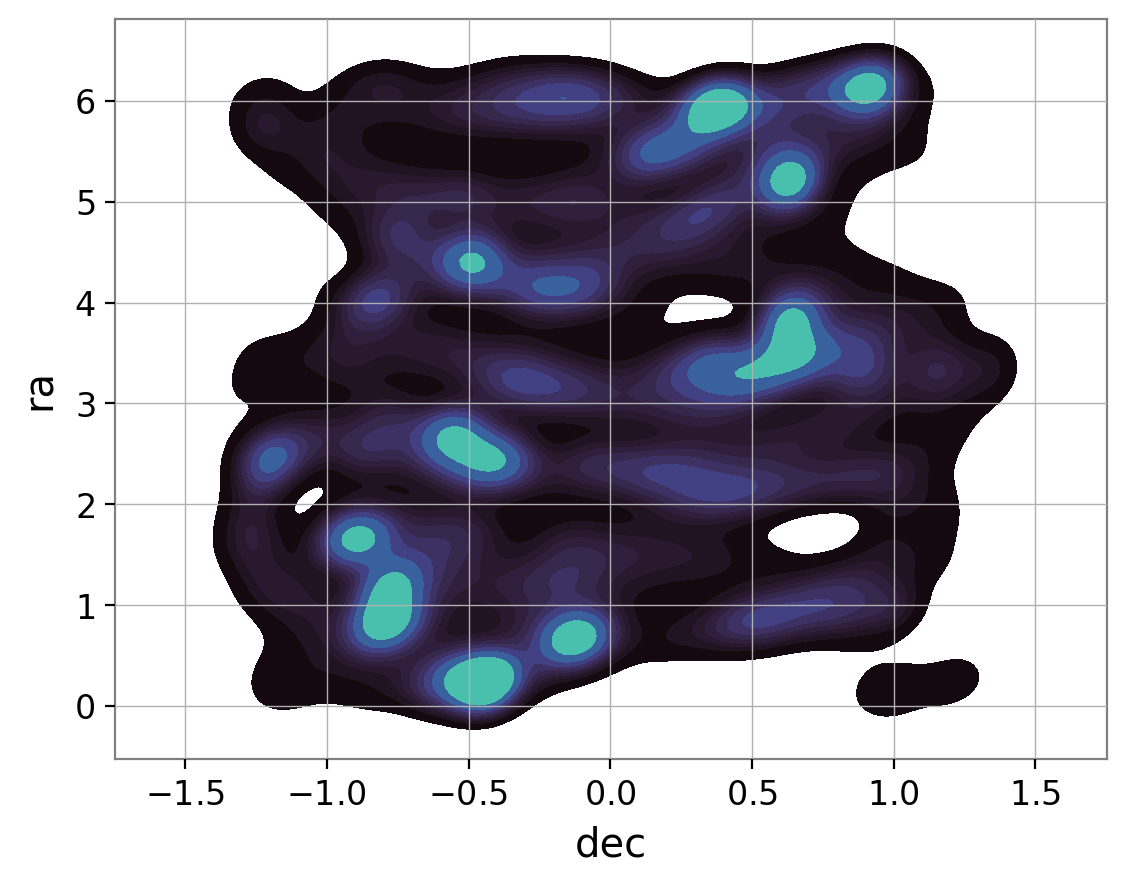

In [ ]:
sb.kdeplot(data=df, x="dec", y="ra", cmap="mako", weights='weights',fill=True)
plt.show()

BELOW THIS IS FIGURING OUT HOW TO PROPERLY GRAB DATA

dict_keys(['C01:IMRPhenomPv2_NRTidal:HighSpin', 'C01:IMRPhenomPv2_NRTidal:LowSpin'])
['chirp_mass', 'mass_ratio', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'lambda_1', 'lambda_2', 'theta_jn', 'psi', 'phase', 'geocent_time', 'azimuth', 'zenith', "'geocent'_time", 'recalib_L1_amplitude_0', 'recalib_L1_amplitude_1', 'recalib_L1_amplitude_2', 'recalib_L1_amplitude_3', 'recalib_L1_amplitude_4', 'recalib_L1_amplitude_5', 'recalib_L1_amplitude_6', 'recalib_L1_amplitude_7', 'recalib_L1_amplitude_8', 'recalib_L1_amplitude_9', 'recalib_L1_phase_0', 'recalib_L1_phase_1', 'recalib_L1_phase_2', 'recalib_L1_phase_3', 'recalib_L1_phase_4', 'recalib_L1_phase_5', 'recalib_L1_phase_6', 'recalib_L1_phase_7', 'recalib_L1_phase_8', 'recalib_L1_phase_9', 'recalib_V1_amplitude_0', 'recalib_V1_amplitude_1', 'recalib_V1_amplitude_2', 'recalib_V1_amplitude_3', 'recalib_V1_amplitude_4', 'recalib_V1_amplitude_5', 'recalib_V1_amplitude_6', 'recalib_V1_amplitude_7', 'recalib_V1_amplitude_8', 'recalib_V1

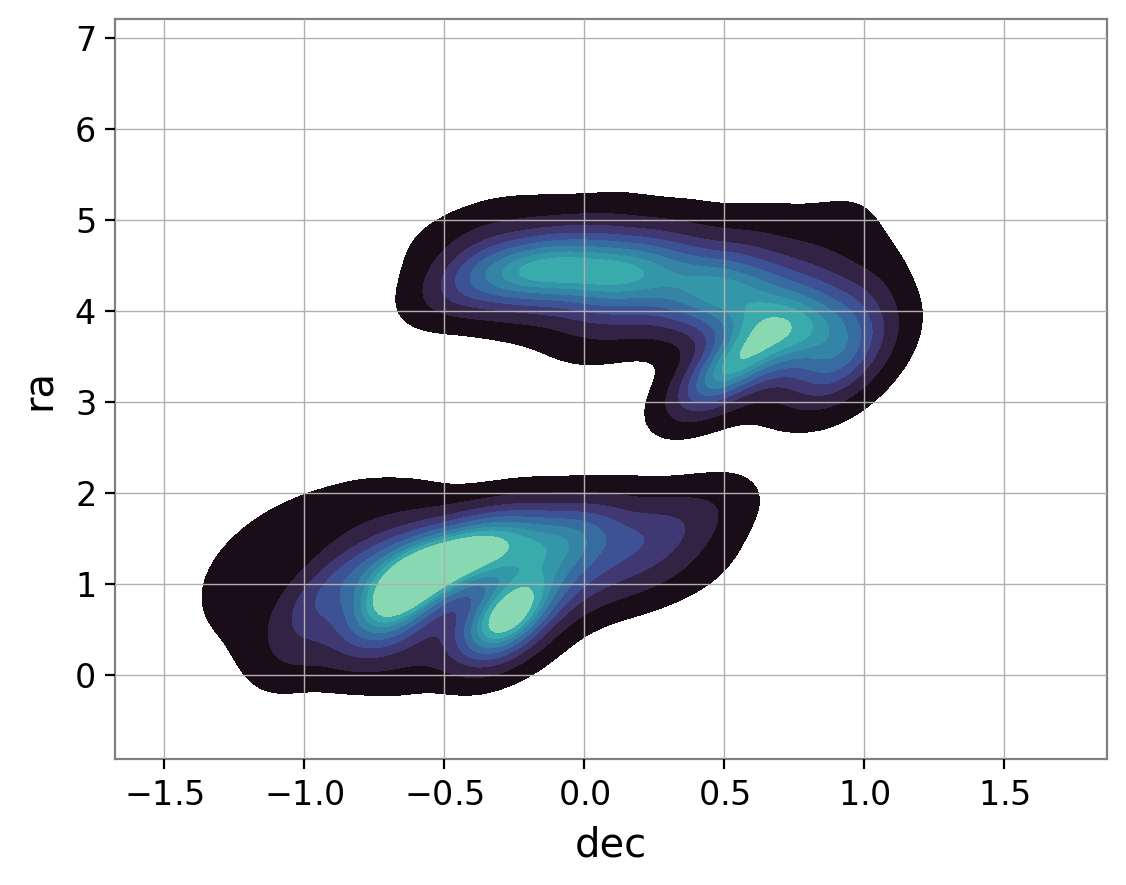

dict_keys(['C01:IMRPhenomPv2_NRTidal:HighSpin', 'C01:IMRPhenomPv2_NRTidal:LowSpin'])
['chirp_mass', 'mass_ratio', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'lambda_1', 'lambda_2', 'theta_jn', 'psi', 'phase', 'geocent_time', 'azimuth', 'zenith', "'geocent'_time", 'recalib_L1_amplitude_0', 'recalib_L1_amplitude_1', 'recalib_L1_amplitude_2', 'recalib_L1_amplitude_3', 'recalib_L1_amplitude_4', 'recalib_L1_amplitude_5', 'recalib_L1_amplitude_6', 'recalib_L1_amplitude_7', 'recalib_L1_amplitude_8', 'recalib_L1_amplitude_9', 'recalib_L1_phase_0', 'recalib_L1_phase_1', 'recalib_L1_phase_2', 'recalib_L1_phase_3', 'recalib_L1_phase_4', 'recalib_L1_phase_5', 'recalib_L1_phase_6', 'recalib_L1_phase_7', 'recalib_L1_phase_8', 'recalib_L1_phase_9', 'recalib_V1_amplitude_0', 'recalib_V1_amplitude_1', 'recalib_V1_amplitude_2', 'recalib_V1_amplitude_3', 'recalib_V1_amplitude_4', 'recalib_V1_amplitude_5', 'recalib_V1_amplitude_6', 'recalib_V1_amplitude_7', 'recalib_V1_amplitude_8', 'recalib_V1

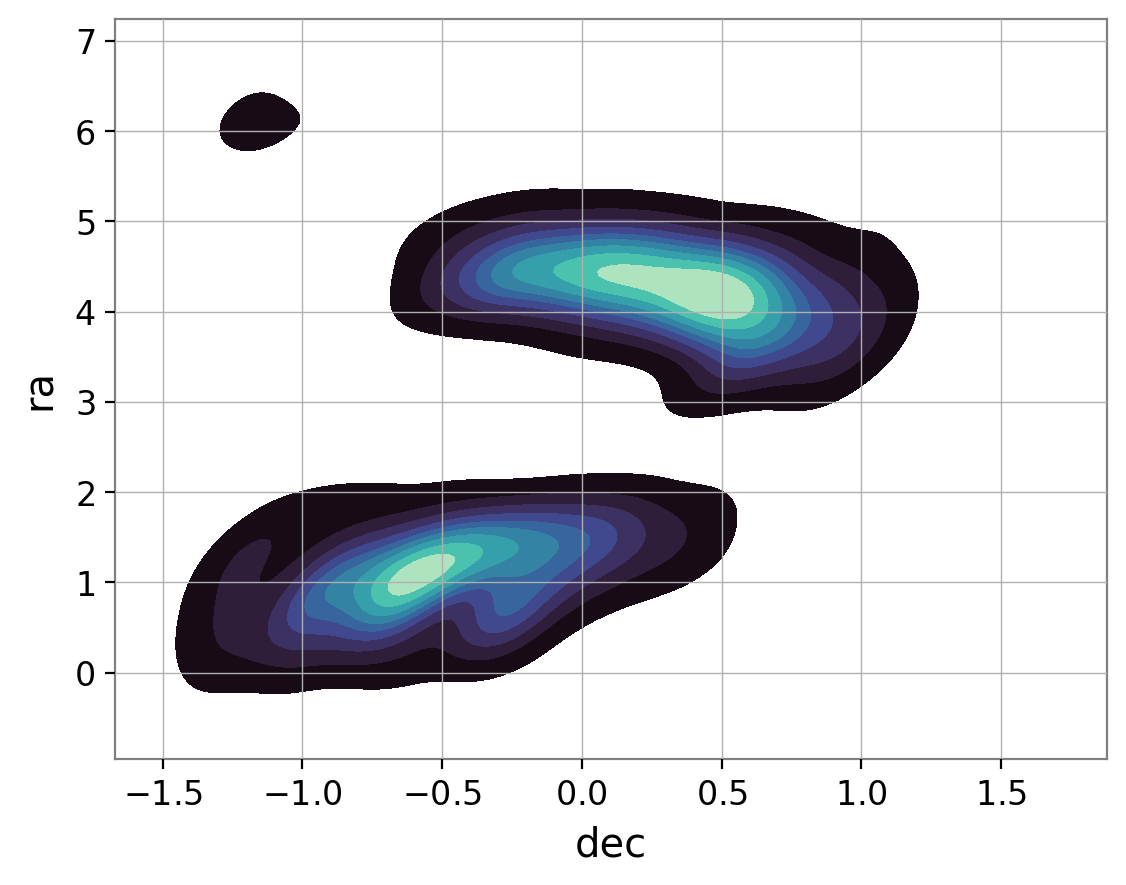

In [ ]:
data = read('/content/IGWN-GWTC2p1-v2-GW190425_081805_PEDataRelease_mixed_cosmo.h5')
samples_dict = data.samples_dict
print(samples_dict.keys())
posterior_samples = samples_dict['C01:IMRPhenomPv2_NRTidal:HighSpin']
print(posterior_samples.keys())
print(posterior_samples['geocent_time'])
sb.kdeplot(data=posterior_samples, x="dec", y="ra", cmap="mako" ,fill=True)
plt.show()
samples_dict = data.samples_dict
print(samples_dict.keys())
posterior_samples = samples_dict['C01:IMRPhenomPv2_NRTidal:LowSpin']
print(posterior_samples.keys())
print(posterior_samples['geocent_time'])
sb.kdeplot(data=posterior_samples, x="dec", y="ra", cmap="mako" ,fill=True)
plt.show()